# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html ), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html ). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report ) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df=pd.read_csv('GermanCredit.csv')
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

In [4]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


<B>Initial check on data for null and type.  Dataset has no null cell and all data has int type except "class" which is the target value</B>

In [5]:
import numpy as np

col = list(df.columns)
col.remove('Class')
df['Class_'] = df['Class']

df['Class'] = (df.Class_.values == 'Good').astype(int)
y = np.array(df['Class'])
X = np.array(df[col])
model_compare= {} # to store different accuracy result


In [6]:
df[['Class_','Class']].head()

,Class_,Class
0,Good,1
1,Bad,0
2,Good,1
3,Good,1
4,Bad,0


<B>The above is data preparation</B>

In [7]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from joblib import dump
from joblib import load

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,20, 2),
          'min_samples_split': np.arange(2,20, 2),'min_samples_leaf': np.arange(1,20,2)}

estimator = DecisionTreeClassifier()
search = GridSearchCV(estimator, param_grid, cv=5)
search.fit(X_train,y_train)

# the best tree
filename = 'tree.sav'
best_tree = search.best_estimator_ 
best_tree.fit(X_train,y_train)
dump(best_tree, filename)
best_tree = load(filename)

# Attributes: cv_results_ , best_estimator_,  best_score_, best_params_
print(search.best_estimator_)
print('\n')
print(search.best_score_)
print('\n')
print(search.best_params_)
print('\n')
print(best_tree)


# report
train_predicted = best_tree.predict(X_train)
test_predicted = best_tree.predict(X_test)

target_names = ['Bad', 'Good']
train_report = classification_report(y_train,train_predicted, target_names=target_names,output_dict=False)
test_report = classification_report(y_test,test_predicted, target_names=target_names, output_dict=False)

print(train_report)
print('\n')
print(test_report)

model_compare['decision_tree_train'] =train_report
model_compare['decision_tree_test'] =test_report


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


0.7485714285714286


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 13, 'min_samples_split': 6, 'splitter': 'best'}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

        

<B>Find the best model using GridSearch and report classification</B>

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [8]:
#! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

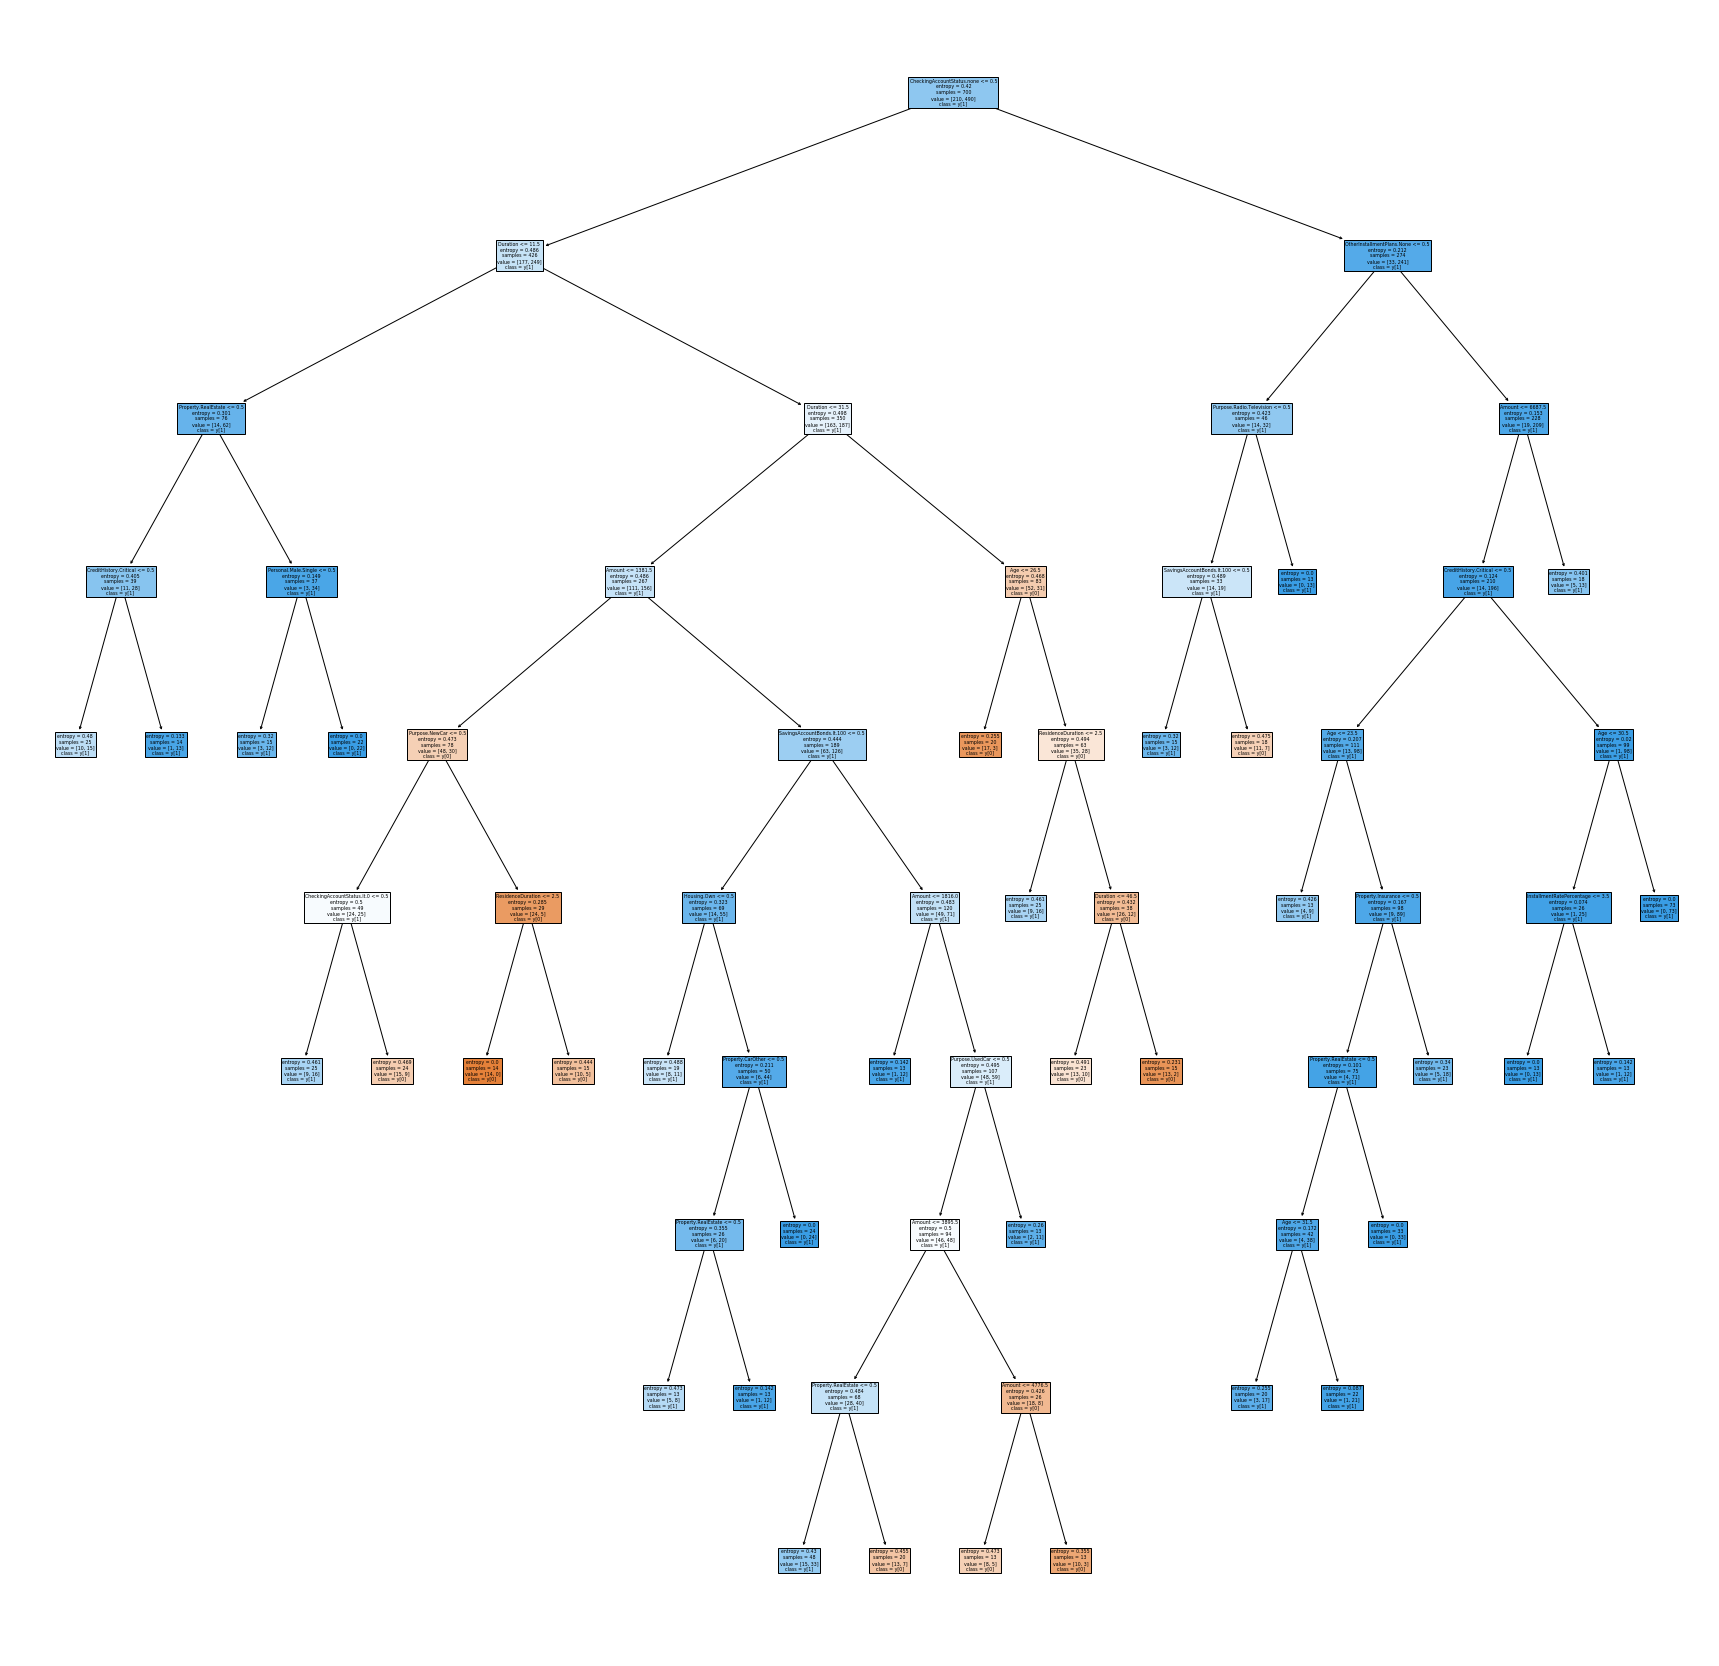

CPU times: user 1.96 s, sys: 150 ms, total: 2.11 s
Wall time: 2.12 s


In [9]:
%%time

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plot_tree(best_tree, feature_names=col, class_names=True, rotate=True,filled=True)
plt.show()

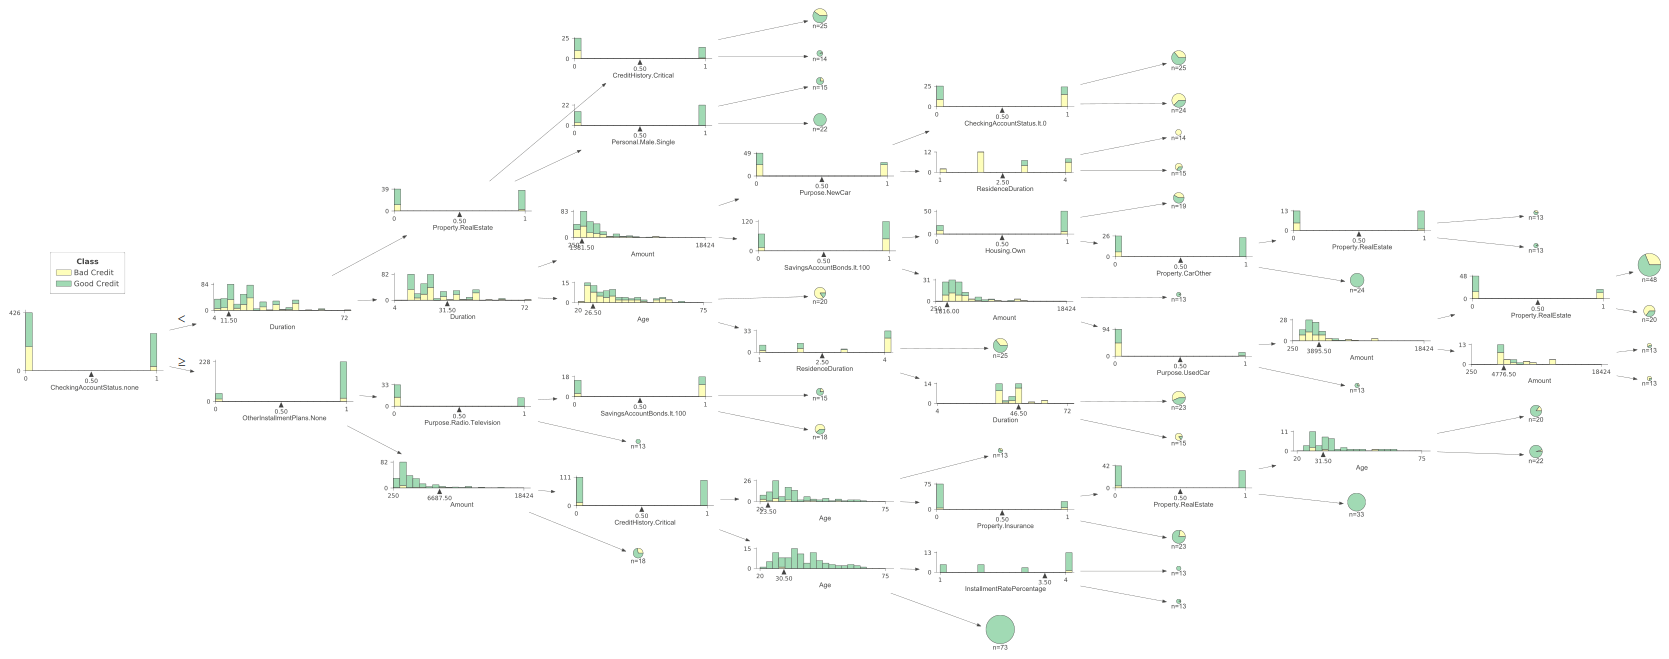

<Figure size 2160x2160 with 0 Axes>

In [10]:
from dtreeviz.trees import *
from IPython.display import Image, display_svg
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
viz = dtreeviz(best_tree,X_train, y_train, orientation ='LR', target_name='Class',feature_names=col, class_names=["Bad Credit", "Good Credit"])  
viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [11]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from joblib import dump
from joblib import load

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
param_grid = {'n_estimators':range(10,100,10),'criterion':['gini','entropy'],'max_depth':range(1,10,2),
          'min_samples_split': range(2,5,1),'min_samples_leaf': range(1,10,2), 'bootstrap':[True,False]}

estimator = RandomForestClassifier()
search = GridSearchCV(estimator, param_grid, cv=5) #scoring='f1'
search.fit(X_train,y_train)

# the best forest
filename = 'forest.sav'
best_forest = search.best_estimator_ 
best_forest.fit(X_train,y_train)
dump(best_forest, filename)
best_forest = load(filename)

# Attributes: cv_results_ , best_estimator_,  best_score_, best_params_
print(search.best_estimator_)
print('\n')
print(search.best_score_)
print('\n')
print(search.best_params_)
print('\n')
print(best_tree)

train_predicted = best_forest.predict(X_train)
test_predicted = best_forest.predict(X_test)

target_names = ['Bad', 'Good']
train_report = classification_report(y_train,train_predicted, target_names=target_names,output_dict=False)
test_report = classification_report(y_test,test_predicted, target_names=target_names, output_dict=False)

print(train_report)
print('\n')
print(test_report)

model_compare['decision_forest_train'] =train_report
model_compare['decision_forest_test'] =test_report


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


0.7757142857142857


{'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 80}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                  

<B>find the best model using GridSearch</B>

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances ). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

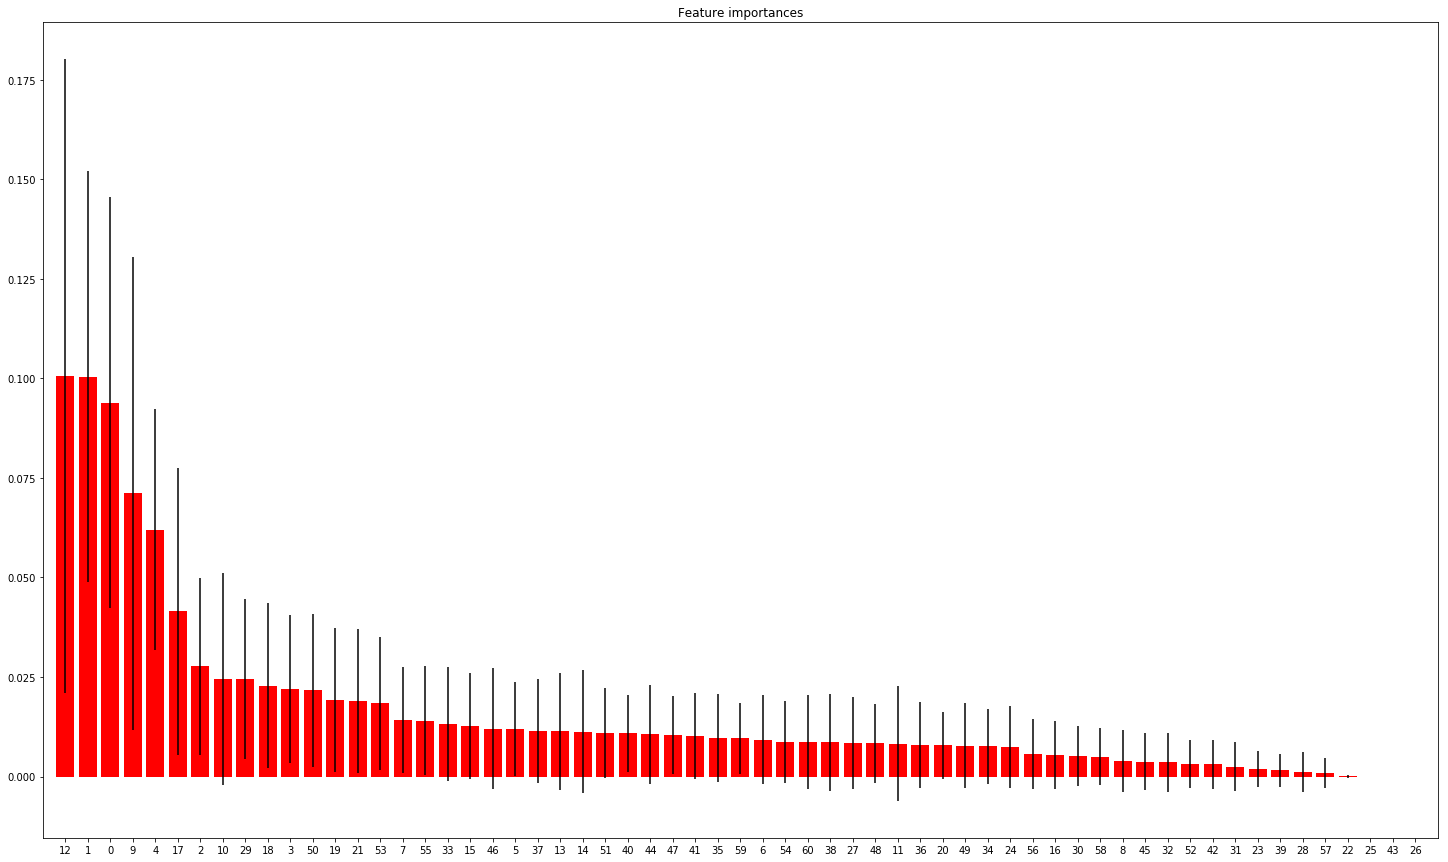

Feature ranking :
1. , index 12, Duration -> (0.100496)
2. , index 1, Amount -> (0.100456)
3. , index 0, InstallmentRatePercentage -> (0.093938)
4. , index 9, ResidenceDuration -> (0.071107)
5. , index 4, Age -> (0.062010)
6. , index 17, NumberExistingCredits -> (0.041495)
7. , index 2, NumberPeopleMaintenance -> (0.027694)
8. , index 10, Telephone -> (0.024585)
9. , index 29, ForeignWorker -> (0.024579)
10. , index 18, CheckingAccountStatus.lt.0 -> (0.022863)
11. , index 3, CheckingAccountStatus.0.to.200 -> (0.021920)
12. , index 50, CheckingAccountStatus.gt.200 -> (0.021694)
13. , index 19, CheckingAccountStatus.none -> (0.019211)
14. , index 21, CreditHistory.NoCredit.AllPaid -> (0.018983)
15. , index 53, CreditHistory.ThisBank.AllPaid -> (0.018389)
16. , index 7, CreditHistory.PaidDuly -> (0.014217)
17. , index 55, CreditHistory.Delay -> (0.014043)
18. , index 33, CreditHistory.Critical -> (0.013097)
19. , index 15, Purpose.NewCar -> (0.012651)
20. , index 46, Purpose.UsedCar -> (0

In [12]:
import matplotlib.pyplot as plt

# Attributes: estimators_, n_features_, n_outputs_, feature_importances_, oob_score_, oob_decision_function_ 

importances = best_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(25,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print the feature ranking
print("Feature ranking :")

for f in range(X.shape[1]):
    print("%d. , index %d, %s -> (%f)" % (f + 1, indices[f], col[f], importances[indices[f]]))

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [13]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

<B>Just a Note here, the partial_dependence plot only available for GridentBoost, not available for RandomForest. Only ploting the pdp_interact here</B>

(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a6c4518>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a199c5b00>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a19728be0>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a675048>}})

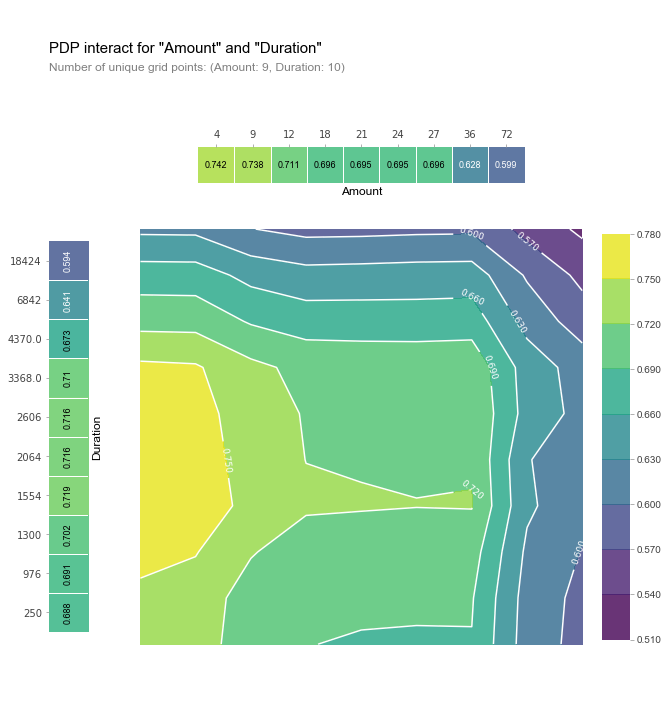

In [14]:
import pdpbox
from pdpbox import pdp

duration_amount = pdp.pdp_interact(model=best_forest,
                        dataset=df[col], 
                        model_features=col, 
                        features=['Duration','Amount'])
pdp.pdp_interact_plot(duration_amount, ['Amount','Duration'],
                      plot_type='contour',
                      x_quantile=True,
                      plot_pdp=True)

(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a6a80f0>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a164f3940>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a164faa58>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a164cf320>}})

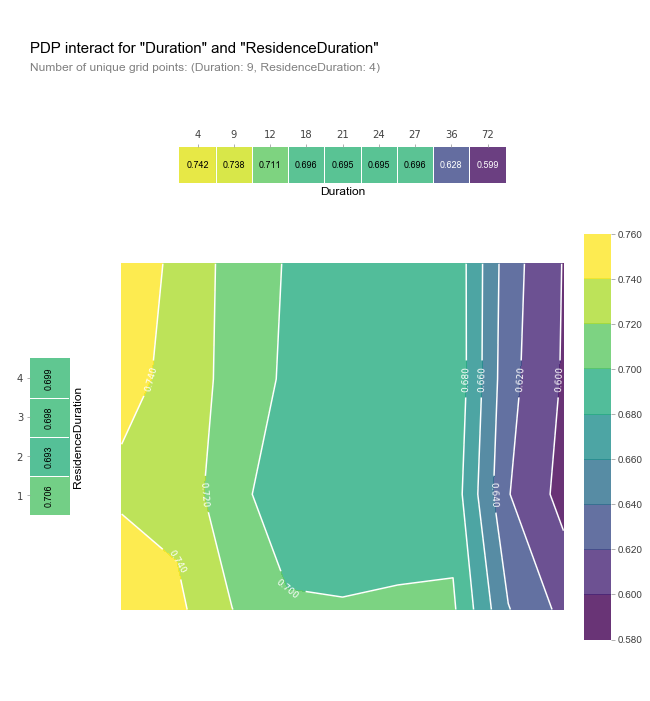

In [15]:
duration_amount = pdp.pdp_interact(model=best_forest,
                        dataset=df[col], 
                        model_features=col, 
                        features=['Duration','ResidenceDuration'])
pdp.pdp_interact_plot(duration_amount, ['Duration','ResidenceDuration'],
                      plot_type='contour',
                      x_quantile=True,
                      plot_pdp=True)

(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a164dbc88>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1986f0b8>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a19888198>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a518e80>}})

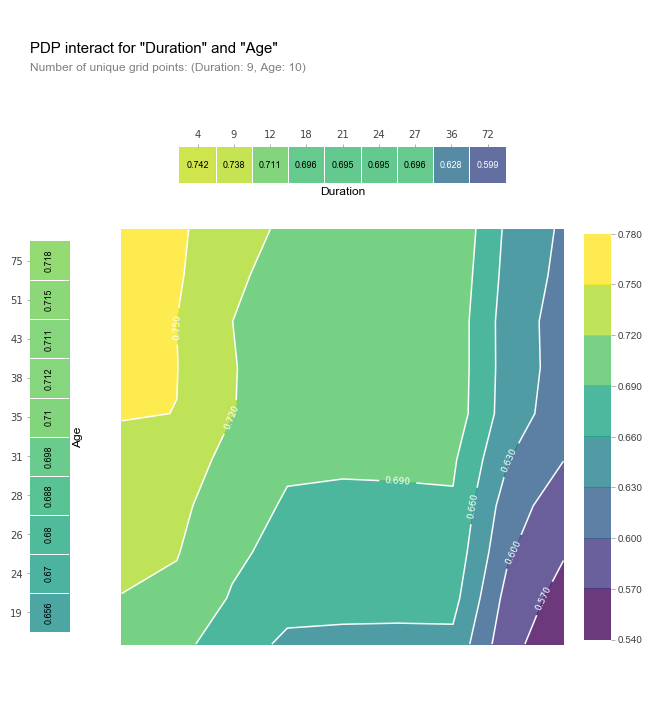

In [17]:
duration_amount = pdp.pdp_interact(model=best_forest,
                        dataset=df[col], 
                        model_features=col, 
                        features=['Duration','Age'])
pdp.pdp_interact_plot(duration_amount, ['Duration','Age'], 
                      plot_type='contour',
                      x_quantile=True,
                      plot_pdp=True)

(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a503940>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a3d7f60>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a19f2a080>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1a813d68>}})

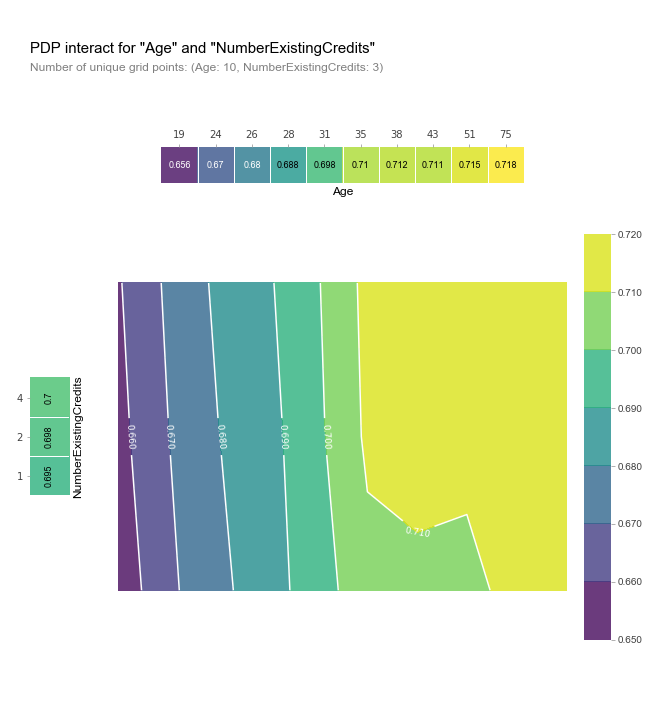

In [18]:
duration_amount = pdp.pdp_interact(model=best_forest,
                        dataset=df[col], 
                        model_features=col, 
                        features=['Age','NumberExistingCredits'])
pdp.pdp_interact_plot(duration_amount, ['Age','NumberExistingCredits'],
                      plot_type='contour',
                      x_quantile=True,
                      plot_pdp=True)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [19]:
#! conda install -c anaconda py-xgboost

In [20]:
#! conda install -c conda-forge catboost

In [21]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

<B>The parameter selection in RandomForestClassifier will be adepted as it is also the family of ensemble decision. A similar parameter selection guilde line also available here [Complete Guide to Parameter Tuning in Gradient Boosting (GBM) in Python](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)</B>

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from joblib import dump
from joblib import load
import numpy as np

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

param_grid = {'loss' : ['deviance', 'exponential'], 'learning_rate' : np.arange(0.1, 1.2, 0.2),
              'n_estimators':range(20,100,10), 'subsample' : np.arange(0.4, 1.1, 0.3), 
              'min_samples_split': range(2,5,1), 'min_samples_leaf': range(1,10,2), 
              'max_depth':range(1,10,2)}

estimator = GradientBoostingClassifier()
search = GridSearchCV(estimator, param_grid, cv=5)
search.fit(X_train,y_train)

# the best forest
filename = 'gradient.sav'
best_gradient = search.best_estimator_ 
best_gradient.fit(X_train,y_train)
dump(best_gradient, filename)
best_gradient = load(filename)

# Attributes: cv_results_ , best_estimator_,  best_score_, best_params_
print(search.best_estimator_)
print('\n')
print(search.best_score_)
print('\n')
print(search.best_params_)
print('\n')
print(best_gradient)

train_predicted = best_gradient.predict(X_train)
test_predicted = best_gradient.predict(X_test)

target_names = ['Bad', 'Good']
train_report = classification_report(y_train,train_predicted, target_names=target_names,output_dict=False)
test_report = classification_report(y_test,test_predicted, target_names=target_names, output_dict=False)

print(train_report)
print('\n')
print(test_report)

model_compare['decision_gradient_train'] =train_report
model_compare['decision_gradient_test'] =test_report


In [ ]:
import matplotlib.pyplot as plt

# Attributes: estimators_, n_features_, n_outputs_, feature_importances_, oob_score_, oob_decision_function_ 

importances = best_gradient.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_gradient.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(25,15))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print the feature ranking
print("Feature ranking :")

for f in range(X.shape[1]):
    print("%d. , index %d, %s -> (%f)" % (f + 1, indices[f], col[f], importances[indices[f]]))

In [ ]:
import pdpbox
from pdpbox import pdp

duration_amount = pdp.pdp_interact(model=best_gradient,
                        dataset=df[col], 
                        model_features=col, 
                        features=['Duration','Amount'])
pdp.pdp_interact_plot(duration_amount, ['Amount','Duration'],
                      plot_type='contour',
                      x_quantile=True,
                      plot_pdp=True)


In [ ]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Age', 'Education-Num')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=23000,
                                                                    figsize=(12, 5),
                                                                    grid_resolution=100)



# for partial_dependence_plots


#print('Convenience plot with ``partial_dependence_plots``')

features = [0, 1, 2, 3, 4, 5, 6, 7, (4,6)]
fig, axs = plot_partial_dependence(model, X_train, features,feature_names=names,n_jobs=3, grid_resolution=50)
#fig.suptitle('Partial dependence plots of pre diabetes on risk factors')
            
plt.subplots_adjust(bottom=0.1, right=1.1, top=1.4)  # tight_layout causes overlap with suptitle

    
print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure()

target_feature = (4, 6)
pdp, axes = partial_dependence(model, target_feature,X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=142)
plt.colorbar(surf)
plt.suptitle('Partial dependence of pre diabetes risk factors')
                 
plt.subplots_adjust(right=1,top=.9)

plt.show()


In [ ]:
import xgboost as xgb

import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)


params = {'max_depth':10,'objective':'binary:logistic'}
dtrain = xgb.DMatrix(xtr,ytr)
dtest = xgb.DMatrix(xte,yte)
evals = [(dtest,'eval'),(dtrain,'train')]
iterations = 2000
early_stop = 10
model = xgb.train(params,dtrain,iterations,evals,early_stopping_rounds=early_stop)
xgb_predicted_values = np.round(model.predict(dtest,ntree_limit=model.best_ntree_limit))
xgb_report = classification_report(yte,xgb_predicted_values)
report = xgb_report.split()
xgb_score = accuracy_score(yte,xgb_predicted_values)
xgb_avg_precision = report[17]
xgb_avg_recall = report[18]
xgb_avg_f1 = report[19]
xgb_avg_support = report[20]
report = xgb_report.split()
data = {}
data['precision'] = xgb_avg_precision
data['score'] = xgb_score
data['recall'] = xgb_avg_recall
data['f1'] = xgb_avg_f1
data['support'] = xgb_avg_support
comparisons.append(data)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(l2_leaf_reg=1,bootstrap_type='Bernoulli',max_depth=10,early_stopping_rounds=early_stop,\
                           subsample=1.,boosting_type='Ordered',od_type='Iter')
model.fit(xtr,ytr,eval_set=(xte,yte))
catboost_predicted_values = model.predict(xte,prediction_type='Class')
catboost_classification_report = classification_report(yte,catboost_predicted_values)
catboost_score = accuracy_score(yte,catboost_predicted_values)
report = xgb_report.split()
catboost_avg_precision = report[17]
catboost_avg_recall = report[18]
catboost_avg_f1 = report[19]
catboost_avg_support = report[20]
report = xgb_report.split()
data = {}
data['precision'] = catboost_avg_precision
data['score'] = catboost_score
data['recall'] = catboost_avg_recall
data['f1'] = catboost_avg_f1
data['support'] = catboost_avg_support
comparisons.append(data)

In [ ]:
import lightgbm as lgb
params = {'objective':'binary','max_depth':10,'early_stopping_round':10,'lambda_2':1.}
train_data = lgb.Dataset(xtr,ytr)
test_data = lgb.Dataset(xte,yte)
iterations = 2000
model = lgb.train(params,train_data,iterations,valid_sets=test_data)
lgb_predicted_values = np.round(model.predict(xte))
lgb_classification_report = classification_report(yte,lgb_predicted_values)
lgb_score = accuracy_score(yte,lgb_predicted_values)
report = xgb_report.split()
lgb_avg_precision = report[17]
lgb_avg_recall = report[18]
lgb_avg_f1 = report[19]
lgb_avg_support = report[20]
lgb = xgb_report.split()
data = {}
data['precision'] = lgb_avg_precision
data['score'] = lgb_score
data['recall'] = lgb_avg_recall
data['f1'] = lgb_avg_f1
data['support'] = lgb_avg_support
comparisons.append(data)

In [ ]:
idx = pd.Index(['Decision Tree','Random Forest','Xgboost','Catboost','Lightgbm'])
df_compare = pd.DataFrame(comparisons,index=idx)
df_compare